In [1]:
#Load final factor table and daily returns

import pandas as pd

final_scores = pd.read_csv("../data/final_factor_scores.csv", index_col=0)
daily_returns = pd.read_csv("../data/daily_returns.csv", index_col=0)

final_scores.index = pd.to_datetime(final_scores.index)
daily_returns.index = pd.to_datetime(daily_returns.index)

final_scores.head()
daily_returns.head()


,AAPL,MSFT,TSLA
Date,,,
2024-01-03,-0.007488,-0.000728,-0.040134
2024-01-04,-0.012700,-0.007178,-0.002181
2024-01-05,-0.004013,-0.000516,-0.001849
2024-01-08,0.024175,0.018871,0.012464
2024-01-09,-0.002263,0.002936,-0.022832


In [2]:
# Define top 2 stocks selection

top_n = 2

# For each day, get the top N stocks by factor score
top_stocks = final_scores.apply(lambda row: row.nlargest(top_n).index.tolist(), axis=1)
top_stocks.head()


Date
2024-01-03    [MSFT, AAPL]
2024-01-04    [TSLA, MSFT]
2024-01-05    [MSFT, TSLA]
2024-01-08    [AAPL, MSFT]
2024-01-09    [MSFT, AAPL]
dtype: object

In [3]:
#Calculate daily portfolio returns

import numpy as np

portfolio_returns = []

for date, stocks in top_stocks.items():
    # Get daily returns for selected stocks
    returns = daily_returns.loc[date, stocks]
    # Equal-weighted average
    portfolio_return = returns.mean()
    portfolio_returns.append(portfolio_return)

# Convert to Series
portfolio_returns = pd.Series(portfolio_returns, index=final_scores.index)
portfolio_returns.head()


Date
2024-01-03   -0.004108
2024-01-04   -0.004679
2024-01-05   -0.001183
2024-01-08    0.021523
2024-01-09    0.000336
dtype: float64

In [4]:
#Calculate cumulative returns

cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.head()


Date
2024-01-03    0.995892
2024-01-04    0.991232
2024-01-05    0.990060
2024-01-08    1.011369
2024-01-09    1.011709
dtype: float64

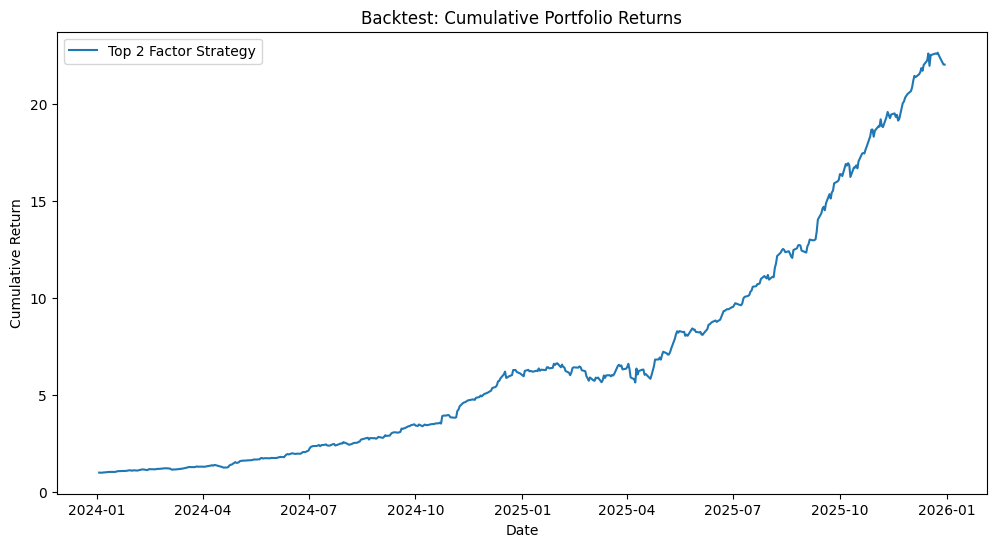

In [5]:
# Plot cumulative returns

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(cumulative_returns, label="Top 2 Factor Strategy")
plt.title("Backtest: Cumulative Portfolio Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()


In [6]:
#Save portfolio returns

portfolio_returns.to_csv("../data/portfolio_returns.csv")
cumulative_returns.to_csv("../data/cumulative_returns.csv")
